# Be able to investigate client requirements for data analysis
# 2.4 Quantitative data analysis

* mean
* median
* standard deviation
* range

## Set up

In [1]:
try:
    import micropip
    await micropip.install(["pyoliteutils", "textblob"])
except:
    pass

In [2]:
from pyoliteutils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={"figure.figsize": (16, 5)})

In [3]:
crowds = pd.read_csv("data/eagles/crowds.csv")
## https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/
crowds

,Date,Opponents,Attendance
0,02/09/1984,Rochdale,1425
1,09/09/1984,Fulham,1145
2,23/09/1984,Salford,1159
3,14/10/1984,Runcorn,1076
4,28/10/1984,Bridgend,826
...,...,...,...
583,24/07/2022,Workington,644
584,07/08/2022,Whitehaven,727
585,12/08/2022,Halifax,569
586,02/09/2022,Featherstone,912


In [4]:
crowds['Date'] = pd.to_datetime(crowds['Date'], format="%d/%m/%Y")
crowds['Year'] = crowds['Date'].dt.year
crowds

,Date,Opponents,Attendance,Year
0,1984-09-02,Rochdale,1425,1984
1,1984-09-09,Fulham,1145,1984
2,1984-09-23,Salford,1159,1984
3,1984-10-14,Runcorn,1076,1984
4,1984-10-28,Bridgend,826,1984
...,...,...,...,...
583,2022-07-24,Workington,644,2022
584,2022-08-07,Whitehaven,727,2022
585,2022-08-12,Halifax,569,2022
586,2022-09-02,Featherstone,912,2022


In [5]:
# Location of opponents
# https://api.postcodes.io/places?q=[query]

# Weather
# https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=39.099724&lon=-94.578331&dt=1643803200&appid=b112bddb3ca3876644b7c695768ae96d

# Outcode
# https://api.postcodes.io/outcodes/:outcode

# Postcodes
# https://api.postcodes.io/postcodes

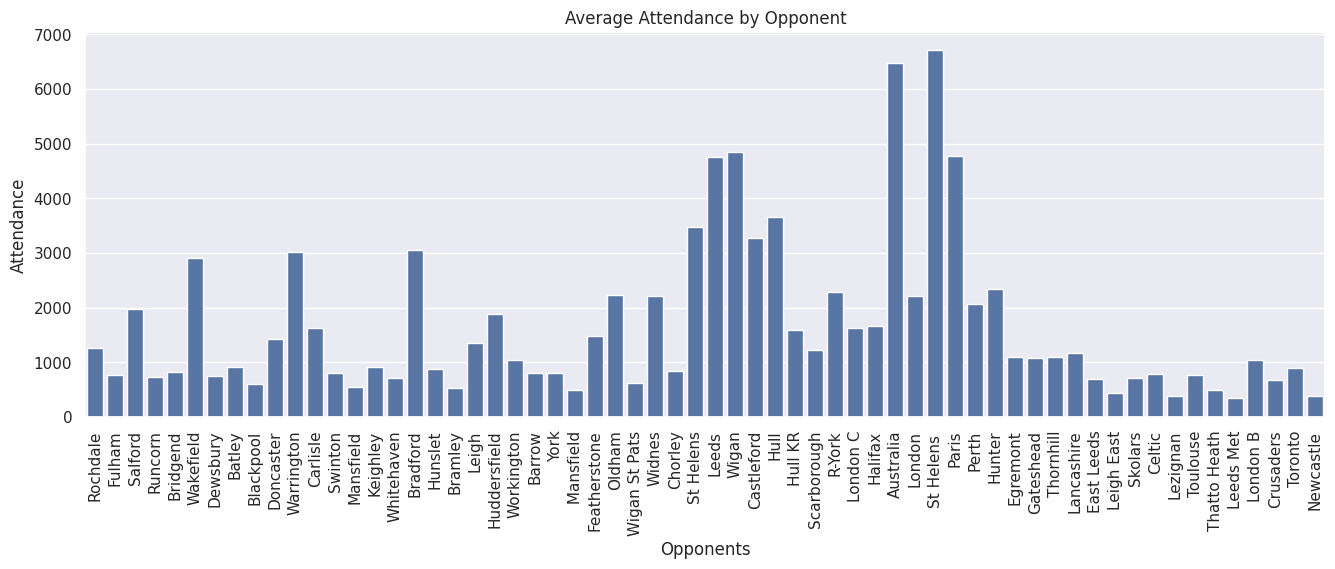

In [6]:
(
    sns.barplot(
        data=crowds, x="Opponents", y="Attendance",
        estimator="mean", 
        errorbar= None # ("pi",100), #Percentile 
    )
    .set(   title="Average Attendance by Opponent"
        )
)
plt.xticks(rotation=90)
plt.show()

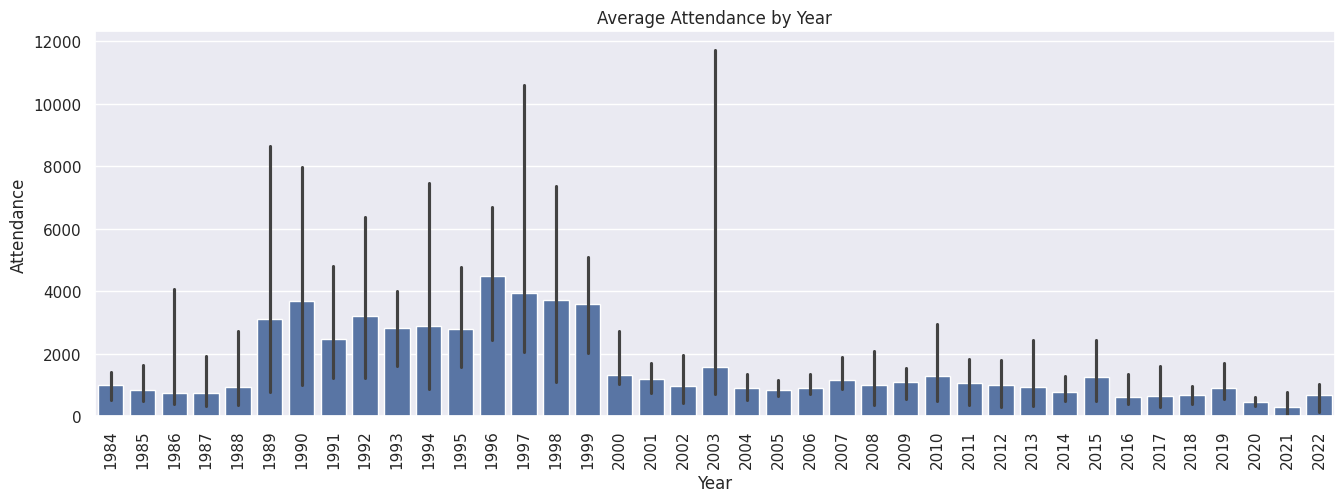

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

(
    sns.barplot(
        data=crowds, x="Year", y="Attendance",
        estimator="mean", errorbar=("pi",100),
        
    )
    .set(title="Average Attendance by Year")
)
plt.xticks(rotation=90)
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


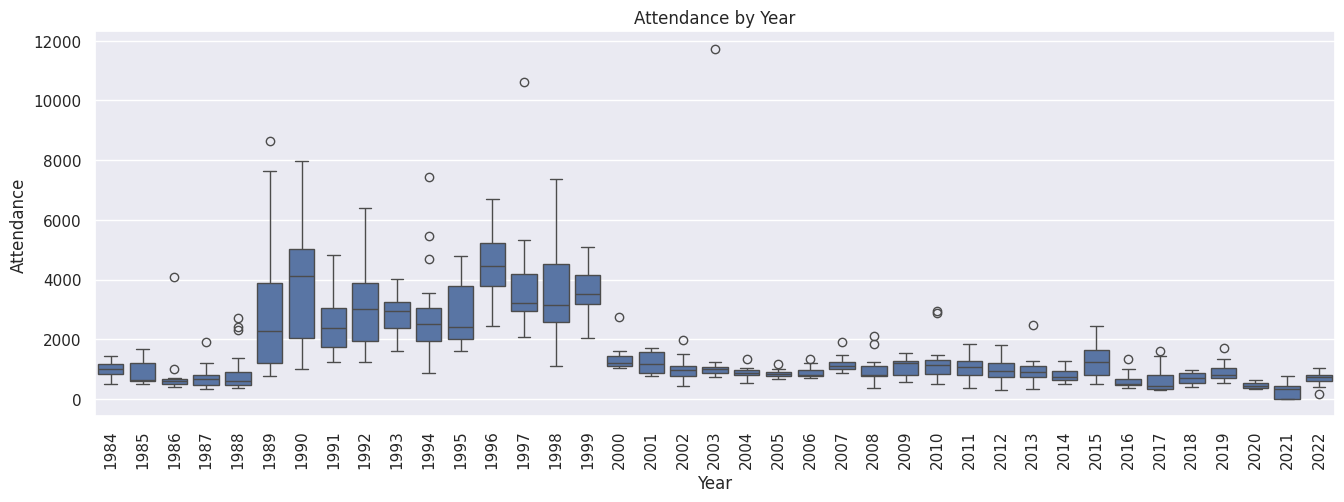

In [8]:
(
    sns.boxplot(
        data=crowds, x="Year", y="Attendance",
        #hue="Opponents",
    )
   .set(title="Attendance by Year")
)
plt.xticks(rotation=90)
plt.show()

In [9]:
# sns.displot(crowds, x="Attendance", hue="Year", multiple="stack")

In [10]:
stadiums = pd.read_csv("data/eagles/stadiums.csv")
stadiums

,Stadium,Postcode
0,OWLERTON,S6 2DE
1,MILLMOOR,S60 1HB
2,HEADINGLEY,LS6 3BR
3,BRAMALL LANE,S2 4QX
4,HILLSBOROUGH,S6 1SW
5,OAKWELL,S71 1ET
6,BELLE VUE,DN4 5DX
7,SALTERGATE,S40 4SX
8,TATTERSFIELD,DN4 5JW
9,THRUM HALL,HX1 4LG


In [11]:
import postcodes_io_api
api  = postcodes_io_api.Api()

def get_latlong(postcode):
    latitude = None
    longitude = None
    
    data = api.get_postcode(postcode)
    #print("data", data)
    if data["status"] != 200 :
        data = api.get_outcode(postcode)
    
    if data["status"] == 200 :        
        if "latitude" in data["result"]:
            latitude = data["result"]["latitude"]
            longitude = data["result"]["longitude"]
    #print("latitude, longitude", latitude, longitude)
    return latitude, longitude
    

def get_latlongs(df):
    if ("Latitude" not in df) and ("Postcode" in df):    
      try:
        df[["Latitude", "Longitude"]] = df.apply(
            lambda row: get_latlong(row["Postcode"]), axis=1, result_type="expand"
        )
      except Exception as e:
          print('Postcode Conversion failed : '+ str(e))
    return df

In [12]:
stadiums = get_latlongs(stadiums)
stadiums


,Stadium,Postcode,Latitude,Longitude
0,OWLERTON,S6 2DE,53.406031,-1.493303
1,MILLMOOR,S60 1HB,53.428758,-1.369397
2,HEADINGLEY,LS6 3BR,53.816081,-1.580617
3,BRAMALL LANE,S2 4QX,53.371341,-1.469862
4,HILLSBOROUGH,S6 1SW,53.410844,-1.500859
5,OAKWELL,S71 1ET,53.552266,-1.468631
6,BELLE VUE,DN4 5DX,53.517626,-1.108750
7,SALTERGATE,S40 4SX,53.238963,-1.434745
8,TATTERSFIELD,DN4 5JW,53.509088,-1.113845
9,THRUM HALL,HX1 4LG,53.721864,-1.884001


In [13]:
questionnaire = pd.read_csv("data/eagles/questionnaire.csv")
questionnaire

,Timestamp,Are you:,When did you first attend a Sheffield Eagles game?,Would you class yourself as:,When did you last attend a game (home or away)?,What made you first start watching the Sheffield Eagles?,What is your favourite memory of the Sheffield Eagles?,"Do you have any Sheffield Eagles memorabilia - old photographs, match day programmes, stickers, shirts, press cuttings etc - that you'd be willing to share with the project? If so please provide brief details.","Can you quickly describe what the Sheffield Eagles means to you, this could be because you are a supporter, a player, a sponsor or an organisation that works with the Club.",What are some of the stories that are part of the history of the Sheffield Eagles that you think deserve sharing to a wider audience?,...,"What do you see as the possible benefits of a project like this, for you personally, the organisation you work for, rugby league in general or the club specifically?",Do you think there is a need for a project like this? If so could you say what that need is.,Please let us have any other comments about the project.,Are You?,How old are you?,How would you describe yourself,Could you provide your postcode? This will help us understand where people are responding from.,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,9/1/2021 14:05:26,A player or member of club staff,2011- 2021,Someone who attends games home or away on a re...,29 August 2021,"Student in Sheffield, was a St. Helens fan and...",Winning the 1895 Cup,No,"My life really! Spend most of my time, both wo...","1895 Cup Win, The Supporters helping save the ...",...,"Reaching a wider audience, gaining better 'cut...",Absolutely a club that has a short but rich hi...,NaN,Male,25-39,White,S70,NaN,NaN,NaN
1,9/2/2021 9:23:44,A current Sheffield Eagles fan who attends games,1984 - 1990,Someone who has a season ticket and attends al...,Last Sunday away at London,I had already been watching the game for a few...,Challenge Cup win in 98,Yes lots of shirts.,The club has been a major part of my life for ...,It would be good for some of the newer fans to...,...,It will educate people thinking of supporting ...,To give the club a higher profile in the city ...,"No, I think everything has been covered.",Male,50-59,White,S2,NaN,NaN,NaN
2,9/2/2021 9:25:42,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Win over Oldham at home,Something the whole family could do together,Winning league for the second time,Lots of photos,Togetherness & passion,Endurance with little support from Council and...,...,Ability to show what the Eagles are about and ...,Yes to preserve the history for future and to ...,NaN,Male,50-59,White,S2,NaN,NaN,NaN
3,9/2/2021 10:05:39,A current Sheffield Eagles fan who attends games,1984 - 1990,Someone who attends games home or away on a re...,Batley Away match,1988,Challenge cup final 1998,"Got replica shirts , Programmes , Signed shirt",local rugby league Club,NaN,...,NaN,"Yes , Every club should have a heritage site",NaN,Male,50-59,White,S70,NaN,NaN,NaN
4,9/2/2021 10:53:30,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Two weeks ago - Batley away.,Mum and Dad were big fans.,Back-to-back Grand Final wins.,Nothing from the past.,The Eagles mean a lot to me as I've met some a...,The years between 2014-2017 where we had a dif...,...,It uncovers new stories that make Rugby League...,Yes I think there is a need as there will be p...,NaN,Male,16-25,White,S5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,9/27/2021 8:00:25,A player or member of club staff,NaN,A current or former player,NaN,NaN,Winning the 2nd division final at Old Trafford,Yes,A brilliant closenit club,NaN,...,NaN,NaN,NaN,Male,60-69,White,WF10,NaN,NaN,NaN
123,9/27/2021 10:13:35,A Sheffield Eagles fan who no longer attends g...,1991 - 2000,A current or former player,2014,"Fat

In [14]:
questionnaire.columns[7]

"Do you have any Sheffield Eagles memorabilia - old photographs, match day programmes, stickers, shirts, press cuttings etc - that you'd be willing to share with the project? If so please provide brief details. "

In [17]:

questionnaire.rename(columns={
    'Could you provide your postcode? This will help us understand where people are responding from. ':"Postcode",
    questionnaire.columns[7]: "Do you have any Sheffield Eagles memorabilia?",
    questionnaire.columns[8]: "What the Sheffield Eagles means to you?",
    questionnaire.columns[9]: "What are some of the stories?",
    questionnaire.columns[10]: "What do you see as the possible benefits of a project like this?",
    questionnaire.columns[11]: "Do you think there is a need for a project like this??",
},inplace=True)
questionnaire

,Timestamp,Are you:,When did you first attend a Sheffield Eagles game?,Would you class yourself as:,When did you last attend a game (home or away)?,What made you first start watching the Sheffield Eagles?,What is your favourite memory of the Sheffield Eagles?,Do you have any Sheffield Eagles memorabilia?,What the Sheffield Eagles means to you?,What are some of the stories?,...,Please let us have any other comments about the project.,Are You?,How old are you?,How would you describe yourself,Postcode,Unnamed: 18,Unnamed: 19,Unnamed: 20,Latitude,Longitude
0,9/1/2021 14:05:26,A player or member of club staff,2011- 2021,Someone who attends games home or away on a re...,29 August 2021,"Student in Sheffield, was a St. Helens fan and...",Winning the 1895 Cup,No,"My life really! Spend most of my time, both wo...","1895 Cup Win, The Supporters helping save the ...",...,NaN,Male,25-39,White,S70,NaN,NaN,NaN,53.541201,-1.474917
1,9/2/2021 9:23:44,A current Sheffield Eagles fan who attends games,1984 - 1990,Someone who has a season ticket and attends al...,Last Sunday away at London,I had already been watching the game for a few...,Challenge Cup win in 98,Yes lots of shirts.,The club has been a major part of my life for ...,It would be good for some of the newer fans to...,...,"No, I think everything has been covered.",Male,50-59,White,S2,NaN,NaN,NaN,53.369602,-1.447879
2,9/2/2021 9:25:42,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Win over Oldham at home,Something the whole family could do together,Winning league for the second time,Lots of photos,Togetherness & passion,Endurance with little support from Council and...,...,NaN,Male,50-59,White,S2,NaN,NaN,NaN,53.369602,-1.447879
3,9/2/2021 10:05:39,A current Sheffield Eagles fan who attends games,1984 - 1990,Someone who attends games home or away on a re...,Batley Away match,1988,Challenge cup final 1998,"Got replica shirts , Programmes , Signed shirt",local rugby league Club,NaN,...,NaN,Male,50-59,White,S70,NaN,NaN,NaN,53.541201,-1.474917
4,9/2/2021 10:53:30,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Two weeks ago - Batley away.,Mum and Dad were big fans.,Back-to-back Grand Final wins.,Nothing from the past.,The Eagles mean a lot to me as I've met some a...,The years between 2014-2017 where we had a dif...,...,NaN,Male,16-25,White,S5,NaN,NaN,NaN,53.422264,-1.463306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,9/27/2021 8:00:25,A player or member of club staff,NaN,A current or former player,NaN,NaN,Winning the 2nd division final at Old Trafford,Yes,A brilliant closenit club,NaN,...,NaN,Male,60-69,White,WF10,NaN,NaN,NaN,53.723921,-1.347748
123,9/27/2021 10:13:35,A Sheffield Eagles fan who no longer attends g...,1991 - 2000,A current or former player,2014,"Father managing DVS, would go to work with him.",2013 grand final win.,NaN,A route into rugby league in a football domina...,The influence of certain individuals (Mark Ast...,...,NaN,Male,25-39,White,HU6,NaN,NaN,NaN,53.781038,-0.371421
124,9/27/2021 12:35:21,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Two weekends ago,Free ticket from childrens' school,Too many to pick one.,Yes quite a few programmes and some photos.,Great to see a Sheffield team playing the grea...,"The reformation, the successes, the new stadium",...,NaN,Male,60-69,White,S11,NaN,NaN,NaN,53.360769,-1.507895
125,9/27/2021 22:27:20,A former player,2001 - 2010,A current or former player,2010,Amateur club,Playing for them,"Shirts, programs, team photo","Sentimental feelings, want to support the club...",End of seasons dos,...,NaN,Male,25-39,White,S74,NaN,NaN,NaN,53.500973,-1.441331


In [18]:
questionnaire = get_latlongs(questionnaire)
questionnaire

,Timestamp,Are you:,When did you first attend a Sheffield Eagles game?,Would you class yourself as:,When did you last attend a game (home or away)?,What made you first start watching the Sheffield Eagles?,What is your favourite memory of the Sheffield Eagles?,Do you have any Sheffield Eagles memorabilia?,What the Sheffield Eagles means to you?,What are some of the stories?,...,Please let us have any other comments about the project.,Are You?,How old are you?,How would you describe yourself,Postcode,Unnamed: 18,Unnamed: 19,Unnamed: 20,Latitude,Longitude
0,9/1/2021 14:05:26,A player or member of club staff,2011- 2021,Someone who attends games home or away on a re...,29 August 2021,"Student in Sheffield, was a St. Helens fan and...",Winning the 1895 Cup,No,"My life really! Spend most of my time, both wo...","1895 Cup Win, The Supporters helping save the ...",...,NaN,Male,25-39,White,S70,NaN,NaN,NaN,53.541201,-1.474917
1,9/2/2021 9:23:44,A current Sheffield Eagles fan who attends games,1984 - 1990,Someone who has a season ticket and attends al...,Last Sunday away at London,I had already been watching the game for a few...,Challenge Cup win in 98,Yes lots of shirts.,The club has been a major part of my life for ...,It would be good for some of the newer fans to...,...,"No, I think everything has been covered.",Male,50-59,White,S2,NaN,NaN,NaN,53.369602,-1.447879
2,9/2/2021 9:25:42,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Win over Oldham at home,Something the whole family could do together,Winning league for the second time,Lots of photos,Togetherness & passion,Endurance with little support from Council and...,...,NaN,Male,50-59,White,S2,NaN,NaN,NaN,53.369602,-1.447879
3,9/2/2021 10:05:39,A current Sheffield Eagles fan who attends games,1984 - 1990,Someone who attends games home or away on a re...,Batley Away match,1988,Challenge cup final 1998,"Got replica shirts , Programmes , Signed shirt",local rugby league Club,NaN,...,NaN,Male,50-59,White,S70,NaN,NaN,NaN,53.541201,-1.474917
4,9/2/2021 10:53:30,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Two weeks ago - Batley away.,Mum and Dad were big fans.,Back-to-back Grand Final wins.,Nothing from the past.,The Eagles mean a lot to me as I've met some a...,The years between 2014-2017 where we had a dif...,...,NaN,Male,16-25,White,S5,NaN,NaN,NaN,53.422264,-1.463306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,9/27/2021 8:00:25,A player or member of club staff,NaN,A current or former player,NaN,NaN,Winning the 2nd division final at Old Trafford,Yes,A brilliant closenit club,NaN,...,NaN,Male,60-69,White,WF10,NaN,NaN,NaN,53.723921,-1.347748
123,9/27/2021 10:13:35,A Sheffield Eagles fan who no longer attends g...,1991 - 2000,A current or former player,2014,"Father managing DVS, would go to work with him.",2013 grand final win.,NaN,A route into rugby league in a football domina...,The influence of certain individuals (Mark Ast...,...,NaN,Male,25-39,White,HU6,NaN,NaN,NaN,53.781038,-0.371421
124,9/27/2021 12:35:21,A current Sheffield Eagles fan who attends games,1991 - 2000,Someone who has a season ticket and attends al...,Two weekends ago,Free ticket from childrens' school,Too many to pick one.,Yes quite a few programmes and some photos.,Great to see a Sheffield team playing the grea...,"The reformation, the successes, the new stadium",...,NaN,Male,60-69,White,S11,NaN,NaN,NaN,53.360769,-1.507895
125,9/27/2021 22:27:20,A former player,2001 - 2010,A current or former player,2010,Amateur club,Playing for them,"Shirts, programs, team photo","Sentimental feelings, want to support the club...",End of seasons dos,...,NaN,Male,25-39,White,S74,NaN,NaN,NaN,53.500973,-1.441331


In [7]:
questionnaire[questionnaire['Are you:'].str.contains("who attends games")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values